#Prepare Enviornment & Import Customized Python Module

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
cd / content / drive / MyDrive / Carol_Copy / PointingShortcutting / ImmersiveVR

In [5]:
!pip install similaritymeasures

 Volume in drive C has no label.
 Volume Serial Number is EE66-681F

 Directory of C:\Users\error\WorkSpace\HegartyLab\ConfiguralSpatialKnowledgeMeasurement\ImmersiveMaze

05/09/2023  05:42 PM    <DIR>          .
05/09/2023  05:42 PM    <DIR>          ..
05/09/2023  01:05 PM             4,589 Desktop_Performance.csv
05/09/2023  05:40 PM    <DIR>          dsp_py_module
05/09/2023  01:05 PM           311,495 immersive_VR_main_Analysis.ipynb
05/09/2023  05:42 PM            66,430 immersive_VR_processs_raw_data.ipynb
05/09/2023  01:05 PM           311,495 immersive_VR_supplemental_Analysis.ipynb
05/09/2023  01:05 PM    <DIR>          Pointing-Phase1
05/09/2023  01:05 PM    <DIR>          Pointing-Phase2
05/09/2023  01:05 PM    <DIR>          ProcessedData
05/09/2023  01:05 PM    <DIR>          Shortcutting
05/09/2023  01:05 PM             5,736 strategy.csv
05/09/2023  01:05 PM             1,738 trial_info.csv
               6 File(s)        701,483 bytes
               7 Dir(s)  756,680,1

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dsp_py_module import Pointing

# Processing Pointing Data

In [ ]:
data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Pointing-Phase1"
pp1 = Pointing(data_path)
pp1.save("ProcessedData/pointingPhase1.csv")

data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Pointing-Phase2"
pp2 = Pointing(data_path)
pp2.save("ProcessedData/pointingPhase2.csv")

# Processing Shortcutting Data

ShortcutMap: Loaded 12 objects
ShortcutMap: Loaded 12 objects
Plotting Mailbox to Chair
Plotting Mailbox to Plant
Plotting Mailbox to Well
Plotting Mailbox to Harp
Plotting Mailbox to Telescope
Plotting Mailbox to Wheelbarrow
Plotting Mailbox to Bookshelf
Plotting Mailbox to Trashcan
Plotting Mailbox to Table
Plotting Mailbox to Stove
Plotting Mailbox to Piano
Plotting Chair to Plant
Plotting Chair to Well
Plotting Chair to Harp
Plotting Chair to Telescope
Plotting Chair to Wheelbarrow
Plotting Chair to Bookshelf
Plotting Chair to Trashcan
Plotting Chair to Table
Plotting Chair to Stove
Plotting Chair to Piano
Plotting Plant to Well
Plotting Plant to Harp
Plotting Plant to Telescope
Plotting Plant to Wheelbarrow
Plotting Plant to Bookshelf
Plotting Plant to Trashcan
Plotting Plant to Table
Plotting Plant to Stove
Plotting Plant to Piano
Plotting Well to Harp
Plotting Well to Telescope
Plotting Well to Wheelbarrow
Plotting Well to Bookshelf
Plotting Well to Trashcan
Plotting Well to Tab

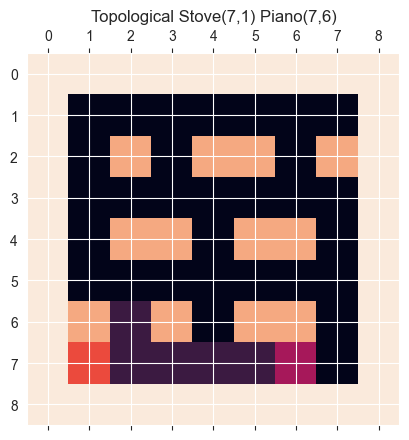

In [2]:
from dsp_py_module import ShortcutMap
from dsp_py_module import Strategy

shortcut_map = ShortcutMap("walls.csv", "objects.csv", "ProcessedData/shortcuts.csv")
learning_map = ShortcutMap("learning_walls.csv", "objects.csv", "ProcessedData/learning_shortcuts.csv", learning=True)
strategy = Strategy("survey_map.txt", "landmarks_on_survey_map.txt", shortcut_map)
strategy.get_all_topological_plots(save_only=True)

In [3]:
# data_path = "/content/drive/MyDrive/Carol_Copy/PointingShortcutting/ImmersiveVR/Shortcutting"
from dsp_py_module import WayFindingTxtVerifier

data_path = "Shortcutting"
trial_info = "trial_info.csv"
## get successful rate and response time for each trial
txt = WayFindingTxtVerifier(data_path)
txt.save("ProcessedData/time.csv")

In [4]:
from dsp_py_module import WayFindingTrajectory

## get trajectory (coordinate files) for each trial
trajectory = WayFindingTrajectory(trial_info, data_path, shortcut_map=shortcut_map)
trajectory.clean_data_w_reboot()
trajectory.combineTrajectory()
trajectory.processTrajectory()
trajectory.save_processed("ProcessedData/processed_trajectory.csv")
trajectory.save_discrete("ProcessedData/discrete_trajectory.csv")

Processing subject number: 401...
Processing subject number: 402...
Processing subject number: 403...
Processing subject number: 404...
Processing subject number: 405...
Processing subject number: 406...
Processing subject number: 407...
Processing subject number: 408...
Processing subject number: 409...
Processing subject number: 410...
Processing subject number: 411...
Processing subject number: 412...
Processing subject number: 413...
Processing subject number: 414...
Processing subject number: 415...
Processing subject number: 416...
Processing subject number: 417...
Processing subject number: 418...
Processing subject number: 419...
Processing subject number: 420...
Processing subject number: 421...
Processing subject number: 422...
Processing subject number: 423...
Processing subject number: 424...
Processing subject number: 425...
Processing subject number: 426...
Processing subject number: 428...
Processing subject number: 429...
Processing subject number: 430...
Processing sub

In [5]:
from dsp_py_module import WayFindingAnalyzer

analyzer = WayFindingAnalyzer(
    trial_info,
    "ProcessedData/time.csv",
    "ProcessedData/processed_trajectory.csv",
    "ProcessedData/discrete_trajectory.csv",
    shortcut_map=shortcut_map,
    learning_map=learning_map,
    strategy=strategy,
)

frechet = analyzer.calculate_frechet()
# analyzer.plot_all_discrete_trajectories_on_map(save_only=True)

Calculating Frechet distance for subject: 401...
Calculating Frechet distance for subject: 402...
Calculating Frechet distance for subject: 403...
Calculating Frechet distance for subject: 404...
Calculating Frechet distance for subject: 405...
Calculating Frechet distance for subject: 406...
Calculating Frechet distance for subject: 407...
Calculating Frechet distance for subject: 408...
Calculating Frechet distance for subject: 409...
Calculating Frechet distance for subject: 410...
Calculating Frechet distance for subject: 411...
Calculating Frechet distance for subject: 412...
Calculating Frechet distance for subject: 413...
Calculating Frechet distance for subject: 414...
Calculating Frechet distance for subject: 415...
Calculating Frechet distance for subject: 416...
Calculating Frechet distance for subject: 417...
Calculating Frechet distance for subject: 418...
Calculating Frechet distance for subject: 419...
Calculating Frechet distance for subject: 420...
Calculating Frechet 

In [6]:
frechet

,SubjectName,TrialOrder,TrialNumber,DiscreteDistance,ContinuousDistance,FrechetLearn,FrechetLearnReversed,FrechetShortcut,FrechetReversed,FrechetTopo,LearnDistance,ReversedLearnDistance,ShortcutDistance,TopoDistance,Failure
0,401,1,19,11.78,9.05,0,4.48,3.65,NaN,3.65,11.78,16.35,7.12,7.12,False
1,401,2,22,9.87,8.43,2.33,4.00,2.88,NaN,4.20,18.12,10.70,7.42,9.26,False
2,401,3,20,14.14,11.98,2.11,2.98,5.00,NaN,2.98,18.80,10.03,6.74,8.18,False
3,401,4,14,6.51,4.89,2.63,4.09,0.84,NaN,1.91,16.37,12.46,4.82,4.96,False
4,401,5,7,18.14,15.99,2.88,2.65,2.65,NaN,2.88,14.87,13.96,8.46,13.12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,451,20,16,21.75,17.38,3.87,3.18,3.87,NaN,3.87,10.47,17.66,4.97,4.97,False
1148,451,21,12,7.48,7.33,5.9,1.23,1.98,NaN,2.65,18.90,9.23,5.13,6.97,False
1149,451,22,8,7.84,6.66,6.04,0.00,2.11,NaN,2.11,21.00,7.83,5.62,7.84,False
1150,451,23,17,34.89,30.09,4.34,4.00,4.00,NaN,4.30,15.18,13.65,8.51,12.20,True


In [7]:
def is_shortest(row):
    shortcuts = [row['FrechetShortcut'], row['FrechetLearnReversed'], row['FrechetLearn'], row['FrechetTopo']]
    check = row['FrechetShortcut'] == min(shortcuts) and row['Failure'] == 0
    return check


def process_each_subject(row):
    return row.apply(is_shortest, axis=1).sum()


# use pandas' apply method to apply the is_shortest function to each row of the DataFrame
# then use pandas' sum method to count the number of rows where failure == 0 and shortcut is the minimum value
# num_of_shortcuts = frechet.apply(lambda row: row.apply(is_shortest).sum(), axis=1)
solution_index = frechet.groupby("SubjectName").apply(lambda row: process_each_subject(row))

# change the row indexing to a column
solution_index = solution_index.reset_index()
# change the only column name to 'solution_index'
solution_index = solution_index.rename(columns={0: 'num_of_shortcuts'})

solution_index['num_of_failures'] = \
frechet.groupby("SubjectName").apply(lambda row: row['Failure'].sum()).reset_index()[0]

solution_index['solution_index'] = solution_index['num_of_shortcuts'] / (24 - solution_index['num_of_failures'])

solution_index

,SubjectName,num_of_shortcuts,num_of_failures,solution_index
0,401,9,0,0.375000
1,402,13,3,0.619048
2,403,18,1,0.782609
3,404,14,0,0.583333
4,405,21,0,0.875000
5,406,17,0,0.708333
6,407,19,0,0.791667
7,408,20,0,0.833333
8,409,11,3,0.523810
9,410,11,2,0.500000


# Check & Plot Trajectories

In [ ]:
traj_post = pd.read_csv("ProcessedData/processed_trajectory.csv")
strategy = pd.read_csv("strategy.csv")
wftime = pd.read_csv("ProcessedData/time.csv")
wftrajc = pd.read_csv("ProcessedData/analyzed_trajectory.csv")
performance = wftrajc.merge(wftime, how='left', on=['ParticipantID', 'TrialNumber'])


def get_sample(strategy, performance, trial, target):
    sample = strategy[strategy['Trial' + str(trial)] == target].Subject.to_list()
    tmp = performance[(performance.Status == 'Success') \
                      & (performance.TrialNumber == trial) \
                      & (performance.ParticipantID.isin(sample))][
        ['ParticipantID', 'LevelDistanceTraveled', 'grid_distance', 'human_distance']]
    return tmp


In [ ]:
sample_results = get_sample(strategy, performance, 8, 'learned').sort_values(
    by=['LevelDistanceTraveled', 'grid_distance', 'ParticipantID'])
sample_results

,ParticipantID,LevelDistanceTraveled,grid_distance,human_distance
799,443,15.48,18.4,15.53


In [ ]:
traj_post[(traj_post.TrialNum == 24) & (traj_post.SubjectNum == 438)]

,SubjectNum,TrialNum,Time,X,Z,X_d,Z_d
11274,438,24,341.0,1.081632,-3.221322,0.799805,-3.099609
11275,438,24,341.0,1.230271,-3.128129,1.599609,-3.099609
11276,438,24,342.0,1.536593,-2.922919,1.599609,-3.099609
11277,438,24,343.0,1.923062,-2.516510,1.599609,-3.099609
11278,438,24,343.0,1.979146,-2.376094,1.599609,-2.000000
11279,438,24,343.0,2.007201,-2.237605,2.500000,-2.000000
11280,438,24,344.0,1.955934,-1.799817,1.599609,-2.000000
11281,438,24,344.0,2.041816,-1.523038,2.500000,-2.000000
11282,438,24,344.0,2.085891,-1.389362,2.500000,-1.000000
11283,438,24,345.0,2.124309,-1.255756,2.500000,-1.000000


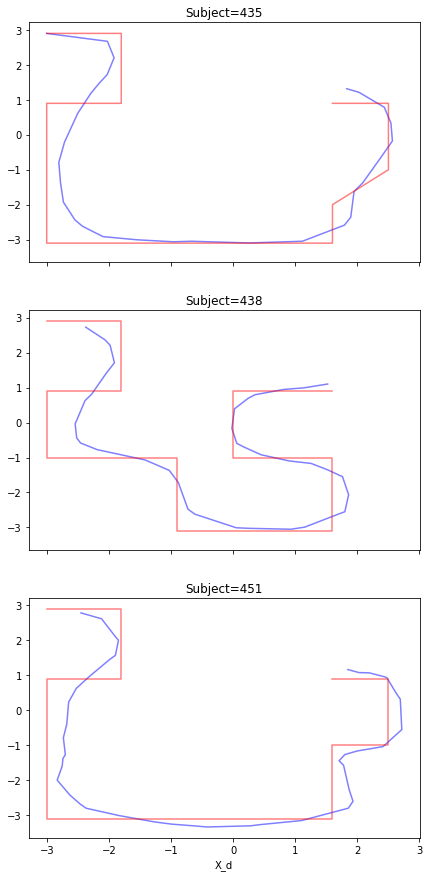

In [ ]:
plotnum = sample_results.ParticipantID.nunique()
grouped = traj_post[
    (traj_post.TrialNum == 9) & (traj_post.SubjectNum.isin(sample_results.ParticipantID.to_list()))].groupby(
    'SubjectNum')
fig, axs = plt.subplots(plotnum, figsize=(7, 5 * plotnum), sharex=True, sharey=True)
i = 0
for key, gp in grouped:
    gp.plot(ax=axs[i], x='X', y='Z', color='blue', alpha=0.5)
    gp.plot(ax=axs[i], x='X_d', y='Z_d', color='red', alpha=0.5)
    axs[i].set_title('Subject=%s' % key)
    axs[i].get_legend().remove()
    i = i + 1
plt.show()